In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [11]:
def bigGraph(df_in, columnName, hist_round, pmf_round):
        data = pd.Series(df_in[columnName])    
        hist = thinkstats2.Hist(round(data,hist_round))   
        pmf = thinkstats2.Pmf(round(data,pmf_round))    
        cdf = thinkstats2.Cdf(data)    
        pdf = thinkstats2.EstimatedPdf(data)    
        thinkplot.PrePlot(6, rows =2, cols=3)    
        thinkplot.SubPlot(1, title="Hist")    
        thinkplot.Hist(hist)    
        thinkplot.SubPlot(2, title="PMF")    
        thinkplot.Pmf(pmf)    
        thinkplot.SubPlot(3, title="CDF")    
        thinkplot.Cdf(cdf)    
        thinkplot.SubPlot(4, title="Prob Plot")   
        thinkstats2.NormalProbabilityPlot(data)    
        thinkplot.SubPlot(5, title="Log PP")    
        thinkstats2.NormalProbabilityPlot(np.log(data))    
        thinkplot.SubPlot(6, title="PDF")
        thinkplot.Pdf(pdf)
        thinkplot.Config()
        return

# Data 3450 Project
# What does demographics tell our health?
Nowadays, the United States has the largest insurance industry in the world. Not only is it number one in premium volume, but it is also the leader in the industry in terms of the number of people employed. ''Insurance premiums written in the U.S. as of 2020 reached over one trillion U.S. dollars. "Insurance companies use demographic information in a variety of ways, including: 
determining premiums for a specific group of customers.
To target specific demographics with advertising.
To set rates for insurance products that are tailored to each customer's risk.
This data set is the insurance data with their customer demographic info and how much they charge to their customer.

At the beginning we take a look to the data.

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#check missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#convert some variables to category datatype
df[["smoker", "children", "sex", "region"]] = df[["smoker", "children", "sex", "region"]].astype("category")

# Visualize our Data
to see is there have anything unnormal

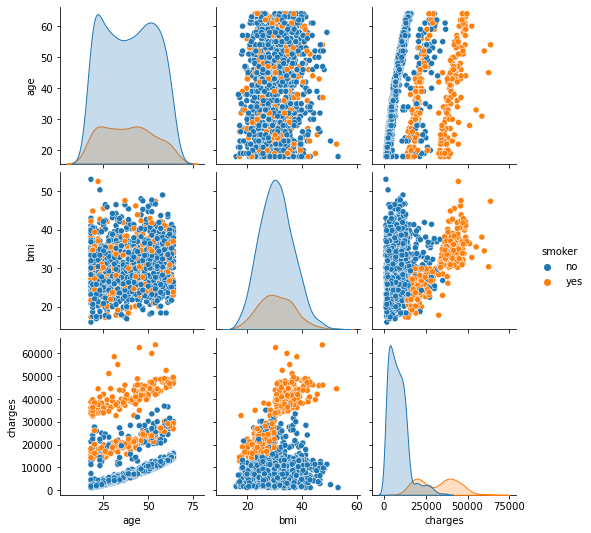

In [12]:
sns.pairplot(df, hue="smoker")

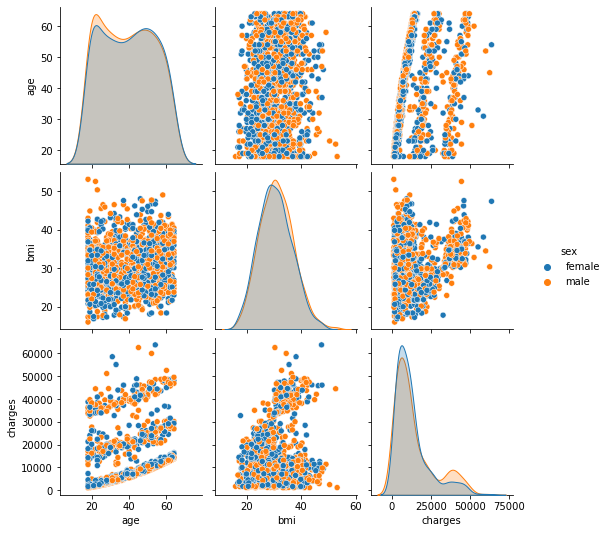

In [9]:
sns.pairplot(df, hue="sex")

<AxesSubplot:xlabel='children', ylabel='charges'>

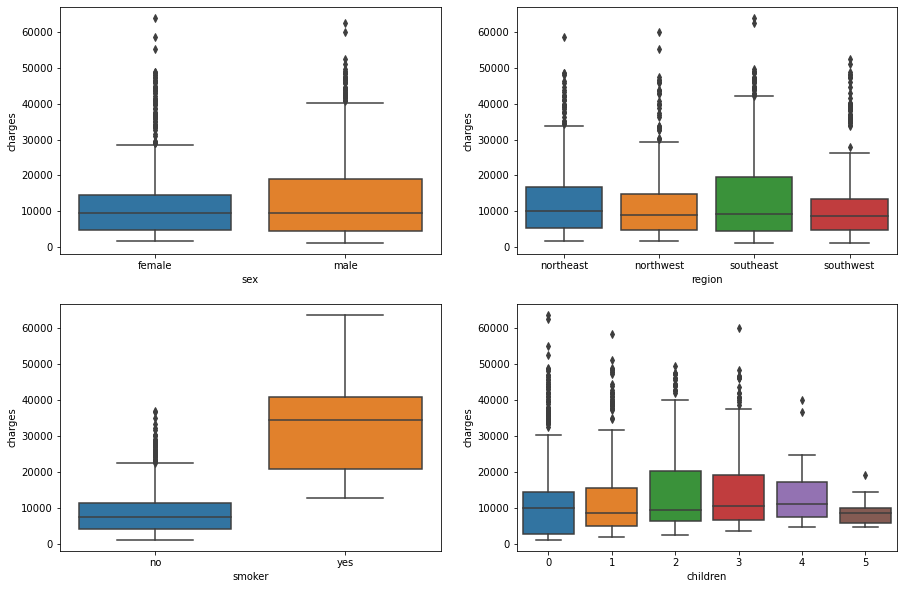

In [14]:
fig, ax = plt.subplots(nrows=2, ncols =2, figsize=(15,10))
sns.boxplot(x="sex", y="charges", data=df, ax=ax[0, 0])
sns.boxplot(x="region", y="charges", data=df, ax=ax[0, 1])
sns.boxplot(x="smoker", y="charges", data=df, ax=ax[1, 0])
sns.boxplot(x="children", y="charges", data=df, ax=ax[1, 1])

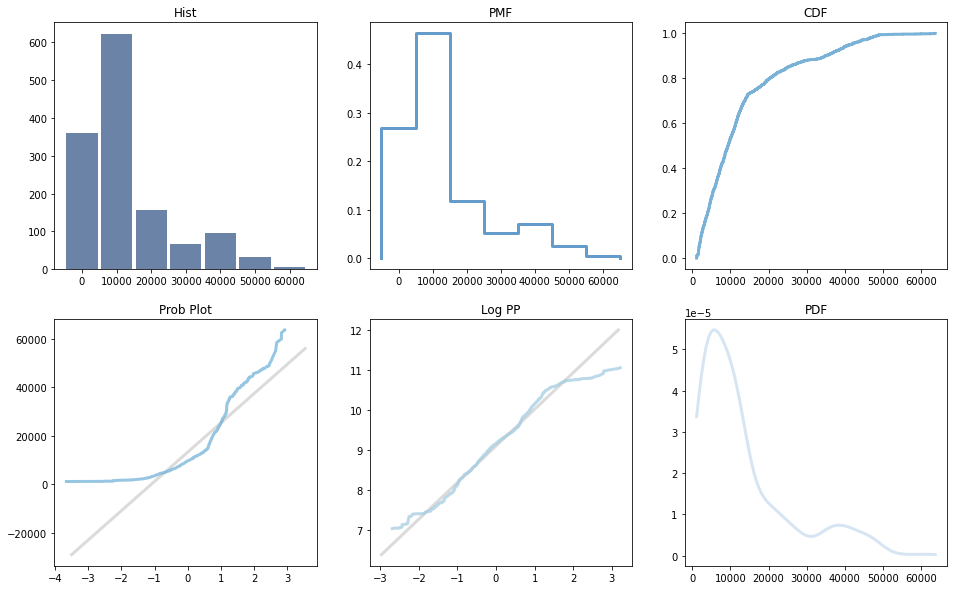

In [10]:
bigGraph(df, 'charges', -4 , -4)

In [15]:
#Transform categorical data
df2 = pd.get_dummies(df, drop_first=True)

# Split and train our data

In [16]:
df2Y = df2["charges"]
df2X = df2.drop(columns={"charges"})
y = np.array(df2Y).reshape(-1,1)
x = np.array(df2X)
x.shape, y.shape

((1338, 12), (1338, 1))

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

# Try out different model see which one works the best

In [29]:
# Linear Regression
model1 = LinearRegression().fit(xTrain,yTrain)
r_sq1 = model1.score(xTest, yTest)
tmp1 = model1.predict(xTest)
print('R-squared: ', r_sq1)
print('RMSE: ', mean_squared_error(tmp1, yTest, squared=False))
print('Intercept: ', model1.intercept_[0])
print('Coefs: ', model1.coef_[0])

R-squared:  0.7430843210227605
RMSE:  6364.021178718594
Intercept:  -10608.23546029059
Coefs:  [  257.00652019   307.8036376   -501.91471473   273.26867914
  1788.40171262  1137.30853495  3548.89139775   735.85514211
 23678.36386883  -960.88888587 -1113.91963573 -1061.59056859]


In [32]:
#Polynomial Regression Degree 2
poly = PolynomialFeatures(degree=2)
model2 = make_pipeline(poly, LinearRegression())
model2.fit(xTrain, yTrain)
ypred = model2.predict(xTest)
print('R-squared: ', model2.score(xTest, yTest))
print('RMSE: ', mean_squared_error(yTest, ypred, squared=False))

R-squared:  0.8412418112319453
RMSE:  5002.699071733881


# Result
The model2 is better. Our model illustrates that given a demographics info, then predicted charges by insyrabce company.
The charges of the insurance is based on the sharing of the risk of death by a large group of people. Rate cab vary depending on the group's risk. With group policies, such as the ones provided through employers, the carrier has already  taken into consideration the risks associated with the group and calculated a rate for that group.
Some common risk factors include: Age, Gender, Occupation, Location, smoker or not etc.
Therefore, We can use the charges as our indicator for health. The lower the insurance charges, that means people will be lower risk to die or more healthier.
